In [61]:
from typing import List

import datetime
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]


# confirmed cases
url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/a9f182afe873ce7e65d2307fcf91013c23a4556c" \
      f"/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
dfC_orig = pd.read_csv(url, error_bad_lines=False)

# deaths
url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/a9f182afe873ce7e65d2307fcf91013c23a4556c" \
      f"/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
dfD_orig = pd.read_csv(url, error_bad_lines=False)

# recovered cases
url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/a9f182afe873ce7e65d2307fcf91013c23a4556c" \
      f"/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"
dfR_orig = pd.read_csv(url, error_bad_lines=False)
dfR_orig


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,31,31,33,34,34,35,35,35,35,41
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,76,76,101,118,118,118,118,118,144,144
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,78,78,96,96,97,105,105,109,114
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,24,24,24,26,26,26,35,42,42,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,Cayman Islands,United Kingdom,19.3133,-81.2546,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
456,Reunion,France,-21.1351,55.2471,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
457,NaN,Barbados,13.1939,-59.5432,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
458,NaN,Montenegro,42.5000,19.3000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# prepare data
for df_T, df_T_orig in zip(["dfC", "dfD", "dfR"], [dfC_orig, dfD_orig, dfR_orig]):
    exec(f"{df_T} = {df_T}_orig.copy()")
    exec(f"{df_T} = {df_T}.sum()")
del dfC["Country/Region"]; del dfC["Lat"]; del dfC["Long"]
del dfD["Country/Region"]; del dfD["Lat"]; del dfD["Long"]
del dfR["Country/Region"]; del dfR["Lat"]; del dfR["Long"]

In [30]:
# get currencies from NBU (National Bank of Ukraine)
# https://bank.gov.ua/NBUStatService/v1/statdirectory/exchange?valcode=EUR&date=YYYYMMDD
def conv_date(str_date):
    str_date = str_date.split("/")
    return f"20{str_date[2]}{int(str_date[0]):02}{int(str_date[1]):02}"
nbu_url = "https://old.bank.gov.ua/NBUStatService/v1/statdirectory/exchange?json"
dates = [conv_date(x) for x in dfC.index.values]

currencies = ["USD", "PLN", "EUR"]
def get_rates(currencies, data_range):
    import urllib.request, json

    res = {}
    for c in currencies:
        res[c] = []
    for YYYYMMDD in data_range:
        print(".", end="")
        c_url = f"{nbu_url}&date={YYYYMMDD}"
        with urllib.request.urlopen(c_url) as url:
            f_data = json.loads(url.read().decode())
            for d_p in f_data:
                if d_p["cc"] in currencies:
                    res[d_p["cc"]].append(d_p["rate"])
    return res
        

In [34]:
rates_res = get_rates(currencies, dates)

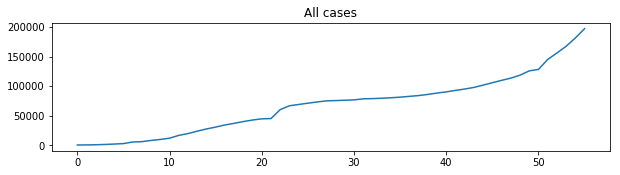

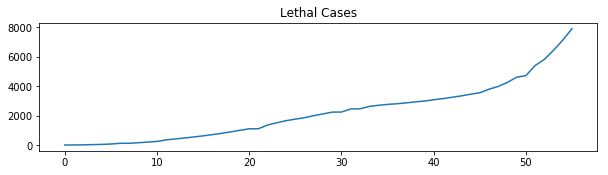

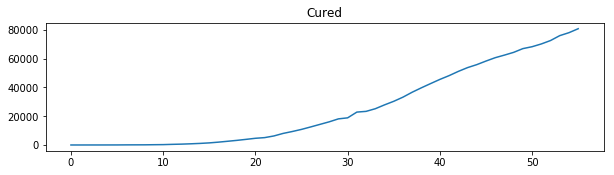

In [54]:
for i, df_T in enumerate([(dfC, "All cases"), (dfD, "Lethal Cases"), (dfR, "Cured")]):
    plt.figure(i)
    plt.subplot(int(f"31{i+1}"))
    plt.plot(range(len(dates)), df_T[0])
    plt.title(df_T[1])

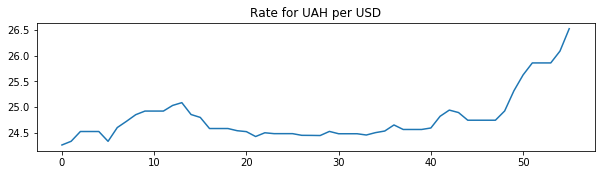

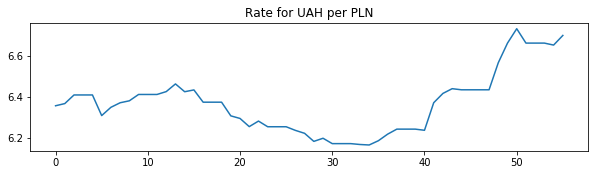

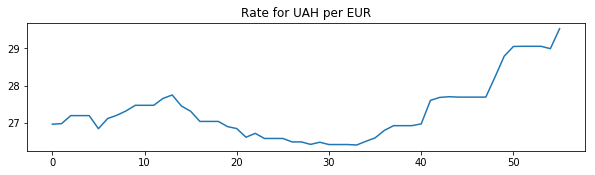

In [53]:
for i, c_rates in enumerate(rates_res):
    plt.figure(i)
    plt.subplot(int(f"31{i+1}"))
    plt.plot(range(len(dates)), rates_res[c_rates])
    plt.title(f"Rate for UAH per {c_rates}")